In [3]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/MyDrive/All CSV/rfm_data (1).csv')
data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,04/11/2023,943.3,Product C,890075,Tokyo
1,2188,04/11/2023,463.7,Product A,176819,London
2,4608,04/11/2023,80.3,Product A,340062,New York
3,2559,04/11/2023,221.3,Product A,239145,London
4,9482,04/11/2023,739.6,Product A,194545,Paris


In [6]:
pip install datetime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.2/254.2 kB 10.2 MB/s eta 0:00:00


In [7]:
data.dtypes

,0
CustomerID,int64
PurchaseDate,object
TransactionAmount,float64
ProductInformation,object
OrderID,int64
Location,object


In [8]:
from datetime import datetime
data['PurchaseDate'] = pd.to_datetime(data['PurchaseDate'])

In [9]:
data['Recency'] = (datetime.now().date() - data['PurchaseDate'].dt.date)
data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency
0,8814,2023-04-11,943.3,Product C,890075,Tokyo,"573 days, 0:00:00"
1,2188,2023-04-11,463.7,Product A,176819,London,"573 days, 0:00:00"
2,4608,2023-04-11,80.3,Product A,340062,New York,"573 days, 0:00:00"
3,2559,2023-04-11,221.3,Product A,239145,London,"573 days, 0:00:00"
4,9482,2023-04-11,739.6,Product A,194545,Paris,"573 days, 0:00:00"


In [10]:
from datetime import datetime

# Assuming your DataFrame is named 'data' and the purchase date column is 'PurchaseDate'
data['Recency'] = (datetime.now().date() - data['PurchaseDate'].dt.date).apply(lambda x: x.days)

In [11]:
# Calculate Frequency
frequency_data = data.groupby('CustomerID')['OrderID'].count().reset_index()
frequency_data.rename(columns={'OrderID': 'Frequency'}, inplace=True)
data = data.merge(frequency_data, on='CustomerID', how='left')

In [12]:
# Calculate Monetary Value
monetary_data = data.groupby('CustomerID')['TransactionAmount'].sum().reset_index()
monetary_data.rename(columns={'TransactionAmount': 'MonetaryValue'}, inplace=True)
data = data.merge(monetary_data, on='CustomerID', how='left')

In [13]:
data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue
0,8814,2023-04-11,943.3,Product C,890075,Tokyo,573,1,943.3
1,2188,2023-04-11,463.7,Product A,176819,London,573,1,463.7
2,4608,2023-04-11,80.3,Product A,340062,New York,573,1,80.3
3,2559,2023-04-11,221.3,Product A,239145,London,573,1,221.3
4,9482,2023-04-11,739.6,Product A,194545,Paris,573,1,739.6


In [14]:
print(data['Recency'])

0      573
1      573
2      573
3      573
4      573
      ... 
995    513
996    513
997    513
998    513
999    513
Name: Recency, Length: 1000, dtype: int64


**Calculating RFM Scores**

In [15]:
# Define scoring criteria for each RFM value
recency_scores = [5, 4, 3, 2, 1]  # Higher score for lower recency (more recent)
frequency_scores = [1, 2, 3, 4, 5]  # Higher score for higher frequency
monetary_scores = [1, 2, 3, 4, 5]  # Higher score for higher monetary value

# Calculate RFM scores
data['RecencyScore'] = pd.cut(data['Recency'], bins=5, labels=recency_scores)
data['FrequencyScore'] = pd.cut(data['Frequency'], bins=5, labels=frequency_scores)
data['MonetaryScore'] = pd.cut(data['MonetaryValue'], bins=5, labels=monetary_scores)

In [16]:
# Convert RFM scores to numeric type
data['RecencyScore'] = data['RecencyScore'].astype(int)
data['FrequencyScore'] = data['FrequencyScore'].astype(int)
data['MonetaryScore'] = data['MonetaryScore'].astype(int)

**Segmentation**

In [17]:
# RFM score by combining the individual scores
data['RFM_Score'] = data['RecencyScore'] + data['FrequencyScore'] + data['MonetaryScore']

# RFM segments based on the RFM score
segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']
data['Value Segment'] = pd.qcut(data['RFM_Score'], q=3, labels=segment_labels)

In [18]:
data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment
0,8814,2023-04-11,943.3,Product C,890075,Tokyo,573,1,943.3,1,1,2,4,Low-Value
1,2188,2023-04-11,463.7,Product A,176819,London,573,1,463.7,1,1,1,3,Low-Value
2,4608,2023-04-11,80.3,Product A,340062,New York,573,1,80.3,1,1,1,3,Low-Value
3,2559,2023-04-11,221.3,Product A,239145,London,573,1,221.3,1,1,1,3,Low-Value
4,9482,2023-04-11,739.6,Product A,194545,Paris,573,1,739.6,1,1,2,4,Low-Value


In [19]:
# RFM Segment Distribution
segment_counts = data['Value Segment'].value_counts().reset_index()
segment_counts.columns = ['Value Segment', 'Count']

pastel_colors = px.colors.qualitative.Pastel

# Create the bar chart
fig_segment_dist = px.bar(segment_counts, x='Value Segment', y='Count',
                          color='Value Segment', color_discrete_sequence=pastel_colors,
                          title='RFM Value Segment Distribution')

# Update the layout
fig_segment_dist.update_layout(xaxis_title='RFM Value Segment',
                              yaxis_title='Count',
                              showlegend=False)

# Show the figure
fig_segment_dist.show()

In [20]:
data['RFM Customer Segments'] = ''

# Assigning RFM segments based on the RFM score
data.loc[data['RFM_Score'] >= 9, 'RFM Customer Segments'] = 'Champions'
data.loc[(data['RFM_Score'] >= 6) & (data['RFM_Score'] < 9), 'RFM Customer Segments'] = 'Potential Loyalists'
data.loc[(data['RFM_Score'] >= 5) & (data['RFM_Score'] < 6), 'RFM Customer Segments'] = 'At Risk Customers'
data.loc[(data['RFM_Score'] >= 4) & (data['RFM_Score'] < 5), 'RFM Customer Segments'] = "Can't Lose"
data.loc[(data['RFM_Score'] >= 3) & (data['RFM_Score'] < 4), 'RFM Customer Segments'] = "Lost"

# Updated data with RFM segments
print(data[['CustomerID', 'RFM Customer Segments']])

     CustomerID RFM Customer Segments
0          8814            Can't Lose
1          2188                  Lost
2          4608                  Lost
3          2559                  Lost
4          9482            Can't Lose
..          ...                   ...
995        2970   Potential Loyalists
996        6669   Potential Loyalists
997        8836   Potential Loyalists
998        1440   Potential Loyalists
999        4759   Potential Loyalists

[1000 rows x 2 columns]


**RFM Analysis**

In [21]:
segment_product_counts = data.groupby(['Value Segment', 'RFM Customer Segments']).size().reset_index(name='Count')

segment_product_counts = segment_product_counts.sort_values('Count', ascending=False)

fig_treemap_segment_product = px.treemap(segment_product_counts,
                                         path=['Value Segment', 'RFM Customer Segments'],
                                         values='Count',
                                         color='Value Segment', color_discrete_sequence=px.colors.qualitative.Pastel,
                                         title='RFM Customer Segments by Value')
fig_treemap_segment_product.show()

<ipython-input-21-3aa9837e81be>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [22]:
import plotly.colors

pastel_colors = plotly.colors.qualitative.Pastel

segment_counts = data['RFM Customer Segments'].value_counts()

# Create a bar chart to compare segment counts
fig = go.Figure(data=[go.Bar(x=segment_counts.index, y=segment_counts.values,
                            marker=dict(color=pastel_colors))])

# Set the color of the Champions segment as a different color
champions_color = 'rgb(158, 202, 225)'
fig.update_traces(marker_color=[champions_color if segment == 'Champions' else pastel_colors[i]
                                for i, segment in enumerate(segment_counts.index)],
                  marker_line_color='rgb(8, 48, 107)',
                  marker_line_width=1.5, opacity=0.6)

# Update the layout
fig.update_layout(title='Comparison of RFM Segments',
                  xaxis_title='RFM Segments',
                  yaxis_title='Number of Customers',
                  showlegend=False)

fig.show()

In [23]:
# Filtering the data to include only the customers in the Champions segment
champions_segment = data[data['RFM Customer Segments'] == 'Champions']

fig = go.Figure()
fig.add_trace(go.Box(y=champions_segment['RecencyScore'], name='Recency'))
fig.add_trace(go.Box(y=champions_segment['FrequencyScore'], name='Frequency'))
fig.add_trace(go.Box(y=champions_segment['MonetaryScore'], name='Monetary'))

fig.update_layout(title='Distribution of RFM Values within Champions Segment',
                  yaxis_title='RFM Value',
                  showlegend=True)

fig.show()

In [24]:
correlation_matrix = champions_segment[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].corr()

# Correlation matrix using a heatmap
fig_heatmap = go.Figure(data=go.Heatmap(
                   z=correlation_matrix.values,
                   x=correlation_matrix.columns,
                   y=correlation_matrix.columns,
                   colorscale='blues',
                   colorbar=dict(title='Correlation')))

fig_heatmap.update_layout(title='Correlation Matrix of RFM Values within Champions Segment')

fig_heatmap.show()

In [25]:
# Average Recency, Frequency, and Monetary scores for each segment
segment_scores = data.groupby('RFM Customer Segments')[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].mean().reset_index()

# A grouped bar chart to compare segment scores
fig = go.Figure()

# Bars for Recency score
fig.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segments'],
    y=segment_scores['RecencyScore'],
    name='Recency Score',
    marker_color='rgb(158,202,225)'
))

# Bars for Frequency score
fig.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segments'],
    y=segment_scores['FrequencyScore'],
    name='Frequency Score',
    marker_color='lavender'
))

# Bars for Monetary score
fig.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segments'],
    y=segment_scores['MonetaryScore'],
    name='Monetary Score',
    marker_color='mediumpurple'
))

# Update the layout
fig.update_layout(
    title='Comparison of RFM Segments based on Recency, Frequency, and Monetary Scores',
    xaxis_title='RFM Segments',
    yaxis_title='Score',
    barmode='group',
    showlegend=True
)

fig.show()

Hence, over here the segment to be looked upon the most will be **"Potential Loyalists"**.
After targeting the **Champions**, the focus must be upon the **Potential Loyalists**. Recency score being high can be use to level up the frequency score, which will somehow increase the monetory value by it's own.

## Step 1: Define High-Value and Low-Value Segments

In [26]:

# Define high-value and low-value customer segments based on RFM segmentation
high_value_segments = ['Champions', 'Loyal Customers']
low_value_segments = ['At Risk', 'Hibernating']

# Filter customers based on segment labels
high_value_customers = data[data['RFM Customer Segments'].isin(high_value_segments)]
low_value_customers = data[data['RFM Customer Segments'].isin(low_value_segments)]


## Step 2: Simulate Sales Uplift for High-Value Segments

In [27]:

# Define uplift parameters
response_rate = 0.20  # Assume 20% of targeted customers respond positively
spending_increase_rate = 0.15  # Assume 15% increase in spending for responders

# Calculate potential sales uplift
estimated_uplift_sales = high_value_customers['MonetaryValue'].sum() * response_rate * spending_increase_rate
print(f"Estimated Sales Uplift from Targeted Campaigns: ${estimated_uplift_sales:.2f}")


Estimated Sales Uplift from Targeted Campaigns: $2379.46


## Step 3: Simulate Marketing Cost Reduction for Low-Value Segments

In [28]:

# Define cost reduction parameters
marketing_cost_per_customer = 5  # Assumed marketing cost per customer in low-value segments

# Calculate potential cost savings
estimated_cost_savings = len(low_value_customers) * marketing_cost_per_customer
print(f"Estimated Marketing Cost Reduction: ${estimated_cost_savings:.2f}")


Estimated Marketing Cost Reduction: $0.00


## Step 4: Calculate Percentage Impact on Sales and Marketing Costs

In [29]:

# Current sales and marketing expense assumptions
current_sales = data['MonetaryValue'].sum()  # Total sales from all segments
current_marketing_cost = len(data) * marketing_cost_per_customer  # Total marketing cost for all customers

# Calculate percentage impacts
sales_uplift_percentage = (estimated_uplift_sales / current_sales) * 100
cost_reduction_percentage = (estimated_cost_savings / current_marketing_cost) * 100

print(f"Estimated Sales Uplift Percentage: {sales_uplift_percentage:.2f}%")
print(f"Estimated Marketing Cost Reduction Percentage: {cost_reduction_percentage:.2f}%")


Estimated Sales Uplift Percentage: 0.41%
Estimated Marketing Cost Reduction Percentage: 0.00%


<ipython-input-30-3690fdb1d334>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




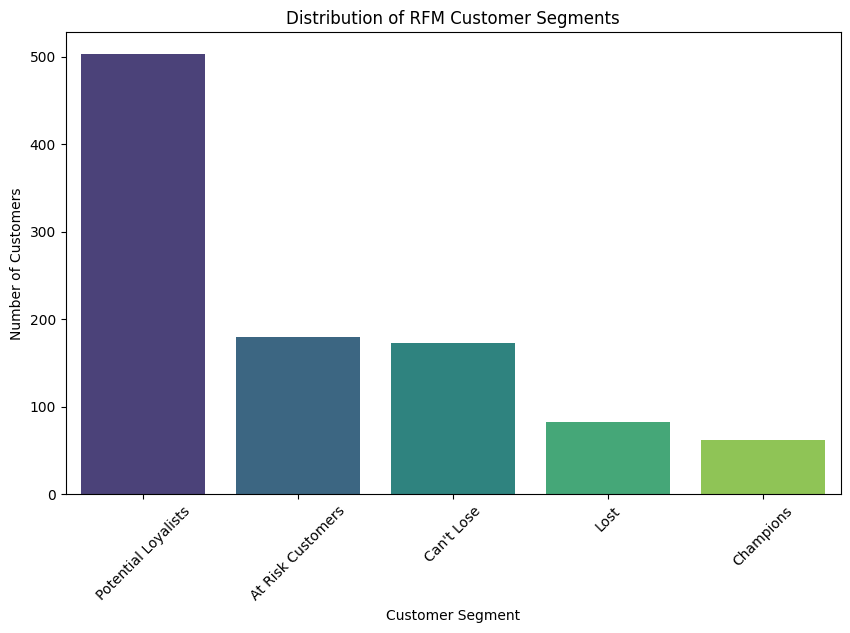

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of customers in each segment
segment_counts = data['RFM Customer Segments'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')
plt.title('Distribution of RFM Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

In [31]:
#the counts of each segment
segment_counts = data['RFM Customer Segments'].value_counts()

# Create the Plotly pie chart
fig = px.pie(
    values=segment_counts.values,
    names=segment_counts.index,
    title='Proportion of RFM Customer Segments',
    color_discrete_sequence=px.colors.sequential.Viridis
)

# Layout for better visuals
fig.update_traces(textinfo='percent+label')
fig.update_layout(showlegend=True)

fig.show()

In [32]:
import plotly.graph_objects as go

# Calculation of current and projected sales
current_sales = data['MonetaryValue'].sum()  # Total sales from current segments
projected_sales = current_sales + estimated_uplift_sales  # Projected sales after uplift

# Data for the bar chart
fig = go.Figure(data=[
    go.Bar(name='Current Sales', x=['Sales'], y=[current_sales], marker_color='skyblue'),
    go.Bar(name='Projected Sales (After Uplift)', x=['Sales'], y=[projected_sales], marker_color='salmon')
])

# Customize the layout
fig.update_layout(
    title="Sales Projection Before and After RFM-Based Uplift",
    xaxis_title="Sales Category",
    yaxis_title="Sales Amount",
    barmode='group'
)

fig.show()
